## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
    - ans: 
    
        slowly: pattern 1, Circle pattern
        
        quickly: pattern 5, Thin right angle pattern


        
- What learning rates and numbers of iterations worked well?
    - ans: 
    
        lr: 0.001 to 0.0005
        
        iterations: 5000 - 20000


        
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


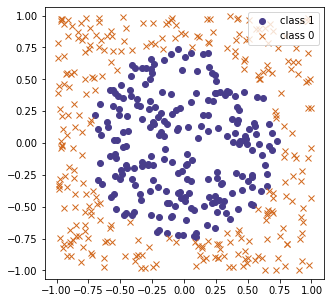

In [49]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [50]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

## Exercise：Complete the pseudocode below

iteration-0---------------
 log loss is 0.7577
 accuracy is 0.554
iteration-200---------------
 log loss is 0.6824
 accuracy is 0.554
iteration-400---------------
 log loss is 0.6734
 accuracy is 0.524
iteration-600---------------
 log loss is 0.6461
 accuracy is 0.586
iteration-800---------------
 log loss is 0.5862
 accuracy is 0.722
iteration-1000---------------
 log loss is 0.5306
 accuracy is 0.746
iteration-1200---------------
 log loss is 0.4985
 accuracy is 0.748
iteration-1400---------------
 log loss is 0.4546
 accuracy is 0.794
iteration-1600---------------
 log loss is 0.3635
 accuracy is 0.894
iteration-1800---------------
 log loss is 0.2877
 accuracy is 0.936
iteration-2000---------------
 log loss is 0.2487
 accuracy is 0.938
iteration-2200---------------
 log loss is 0.2264
 accuracy is 0.932
iteration-2400---------------
 log loss is 0.2118
 accuracy is 0.934
iteration-2600---------------
 log loss is 0.2014
 accuracy is 0.934
iteration-2800---------------
 log loss i

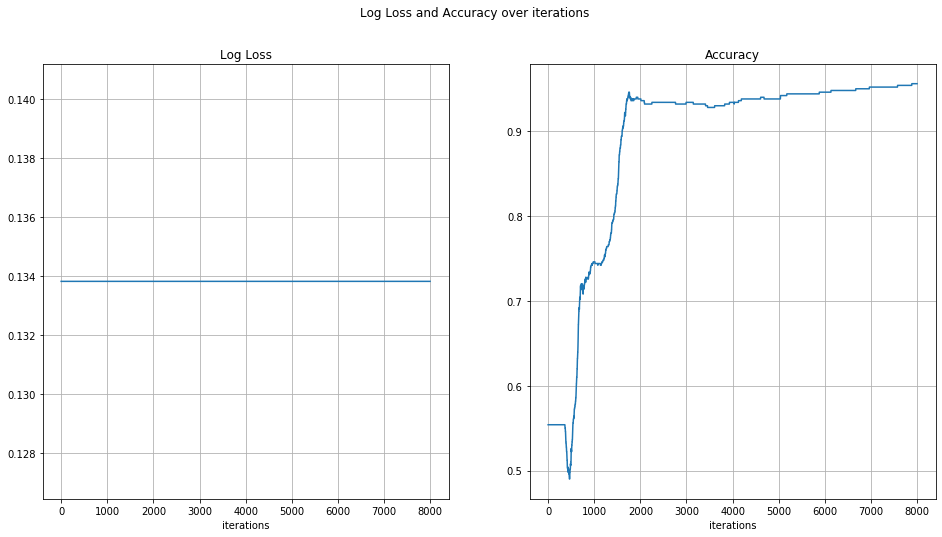

In [51]:
#### Initialize the network parameters
np.random.seed(1241)

W_1 = np.random.uniform(-1, 1, size=(3,4))
W_2 = np.random.uniform(-1, 1, size=(4))
num_iter = 8000
learning_rate = .0008
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_predict, (W_1_slope, W_2_slope) = forward_pass(W_1, W_2)
    ## Update the weight matrices
    W_1 = W_1 - learning_rate * W_1_slope
    W_2 = W_2 - learning_rate * W_2_slope
    ### Compute the loss and accuracy
    loss = loss_fn(y, y_predict)
    loss_vals.append(curr_loss)
    acc = np.sum((y_predict >= .5) == y) / num_obs
    accuracies.append(acc)
    ## Print the loss and accuracy for every 200th iteration
    if ((i % 200) == 0):
        print('iteration-{}---------------\n log loss is {:.4f}\n accuracy is {}'.format(i, loss, acc))

plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow

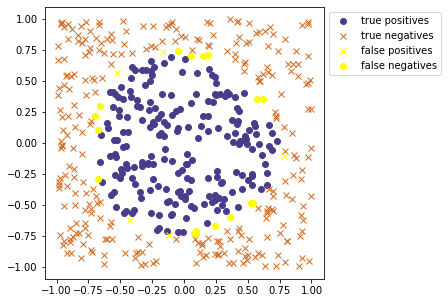

In [52]:
pred_class1 = (y_predict >=.5)
pred_class0 = (y_predict < .5)

fig, ax = plt.subplots(figsize=(5, 5))
## correct predictions
ax.plot(x_mat[pred_class1&(y==1), 0],
        x_mat[pred_class1&(y==1), 1], 
        'ro', color='darkslateblue', label = 'true positives')
ax.plot(x_mat[pred_class0&(y==0), 0], 
        x_mat[pred_class0&(y==0), 1],
        'bx', color='chocolate', label = 'true negatives')
## miss predictions
ax.plot(x_mat[pred_class1&(y==0), 0],
        x_mat[pred_class1&(y==0), 1],
        'x', color='yellow', label = 'false positives')
ax.plot(x_mat[pred_class0&(y==1), 0],
        x_mat[pred_class0&(y==1), 1],
        'o', color='yellow', label = 'false negatives')
ax.legend(loc='best', bbox_to_anchor=(1, 1))